In [251]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [252]:
#Initialisation for the different algorithms:
barcode1 = np.array([[0, 100.], [1.37, 94.2], [5.80, 86.], [18., 83.75], [42., 60.]])      # 24 permutations (1234)
barcode2 = np.array([[0., 10.], [1., 8.], [2, 9.], [3., 7.]])      # 3 permutations (213)
barcode3 = np.array([[0., 10.], [1., 9.], [2., 8.], [3., 7.], [4., 6.]])        # 24 permutations (1234)
barcode4 = np.array([[0., 100.], [1.37, 94.2], [5.80, 86.], [9.75, 85.], [18., 83.75], [42., 60.]])       #120 permutations (12345)
barcodeE = np.array([[0., 10.], [9., 1.], [6., 5.], [5., 11.]])

#Choose your barcode:
barcode = barcode4
barcode_size = int(barcode.size/2)

In [253]:
#Tests:
error1 = 0; error2 = 0; error3 = 0

for n in range(barcode_size):
    if barcode[n][0] > barcode[n][1]:
        print ("error1: birth need to be lower than death")
        error1 = 1
    
for n in range(barcode_size - 1):
    if barcode[n][0] > barcode[n+1][0]:
        print("error2: we need a sorted by birth barcode.")
        error2 = 1

for n in range(barcode_size - 1):
    if barcode[n+1][1] > barcode[0][1]:
        print("error3: the first bar must contains all the others")
        error3 = 1

if error1 == 0 and error2 == 0 and error3 == 0 :
    print ("Tests: passed")    

Tests: passed


In [254]:
#Auto initialisation with in function of what was token:
matrix_adj = np.zeros((barcode_size, barcode_size))     #empty matrix.
matrix_pb = np.zeros((barcode_size, barcode_size))     #empty matrix.
matrix_real = np.zeros((barcode_size, barcode_size))    #empty matrix.
matrix_fr = np.zeros((barcode_size, barcode_size))    #empty matrix.
TAM_min = np.zeros((barcode_size, barcode_size))
TAM_max = np.zeros((barcode_size, barcode_size))

permutation_number = 1                                #Number of possible permutations for a barcode.
index = np.linspace(0, 0, barcode_size-1)    
proba = np.linspace(0, 0, barcode_size-1)             #list of all probabilities for each line (equi).
finit_support = np.zeros(barcode_size)                  #lifetimes
for i in range(barcode_size):
    finit_support[i] += barcode[i][1] - barcode[i][0] 
Number = 1000
vector_fr2 = []
H_min = 1000000.
H_max = -1

In [255]:
#Permutation Number:
for i in range(barcode_size)[1:]:
    for j in range(barcode_size)[:i]:
        if barcode[j][1] > barcode[i][1]:
            index[i-1] += 1
    permutation_number *= index[i-1]
    
#Equivalent Class:
for i in range(barcode_size - 1):
    index[i] = index[i] - (i+1)        #To know which of them are already in the right order.
clock = 1
while(clock < barcode_size):
    min = 1000
    memory = 0
    for j in range(barcode_size - 1):
        if index[j] < min:
            min = index[j]
            memory = j
    index[memory] = clock
    clock += 1

In [256]:
#Matrix initialisation:

#Probability Matrix:
for i in range(barcode_size):
    for j in range(barcode_size)[i+1:]:
        if barcode[i][1] > barcode[j][1]:
            matrix_pb[j][i] = 1
for x in range(barcode_size)[1:]:
    clock = 0
    for y in range(barcode_size)[:x]:
        clock += matrix_pb[x][y]             #number of 1 on a single line
    probability = 1./clock                   #normalisation for equiprobability
    for z in range(barcode_size)[:x]:
        if matrix_pb[x][z] == 1:
            matrix_pb[x][z] = probability

#Adjacency Matrix:
for k in range(barcode_size):
    matrix_adj[k][k] = barcode[k][0]             
for l in range(barcode_size):
    for m in range(barcode_size)[l+1:]:
        if barcode[l][1] > barcode[m][1]:
            matrix_adj[m][l] = barcode[m][1]

In [259]:
#Possible realisation
vector_fr2 = []
for n in range(Number):
    #Real Matrix
    for k in range(barcode_size):
        matrix_real[k][k] = matrix_adj[k][k]   
    for i in range(barcode_size)[1:]:
        clock = 0
        for j in range(barcode_size)[:i]:
            if matrix_pb[i][j] != 0:
                clock += 1
        if clock != 0:
            probability = 1./clock
        else:
            probability = 0.
        proba[i-1] = probability
        complete = False
        nbr = random.random()
        for j in range(barcode_size)[:i]:
            if (nbr < ((j+1)*proba[i-1]) and (not complete)):
                matrix_real[i][j] = matrix_adj[i][j]
                complete = True
            else:
                matrix_real[i][j] = 0
    focus_index = np.zeros(barcode_size-1)
    for a in range(barcode_size)[:-1]:
        for b in range(barcode_size)[a+1:]:
            if matrix_real[b][a] != 0:
                if a != 0:
                    focus_index[b-1] +=  1. + focus_index[a-1]
                else:
                    focus_index[b-1] += 1.
    
    vector_fr = []
    H = 0.
    
    for c in range(barcode_size-1):
        find = False
        if len(vector_fr) == 0:
            vector_fr += [[focus_index[c], 1]]
            find = True
        else:
            for i in range(int(len(vector_fr))):
                if int(focus_index[c]) == vector_fr[i][0] and not find:
                    vector_fr[i][1] += 1
                    find = True
        if not find:
            vector_fr += [[focus_index[c], 1]]   
    for j in range(int(len(vector_fr))):
        vector_fr[j][1] *= (1/int(len(focus_index)))
        vector_fr[j][1] = round(vector_fr[j][1], 3)
        
    for k in range(int(len(vector_fr))):
        H += vector_fr[k][1] * math.log(vector_fr[k][1], 10)
    if H < 0.:
        H = -round(H, 3)

    find2 = False
    if len(vector_fr2) == 0:
        vector_fr2 += [[H, 1]]
        find2 = True
    else:
        for l in range(int(len(vector_fr2))):
            if H == vector_fr2[l][0] and not find2:
                vector_fr2[l][1] += 1
                find2 = True
    if not find2:
        vector_fr2 += [[H, 1]]

for e in range(int(len(vector_fr2))):
    if vector_fr2[e][1] != 0:
        vector_fr2[e][1] = (vector_fr2[e][1]/Number)
        vector_fr2[e][1] = round(vector_fr2[e][1], 5)   
        
vector_fr2 = sorted(vector_fr2, key=lambda Fvalue: Fvalue[0])
if vector_fr2[int(len(vector_fr2))-1][0] != (round(-math.log(0.2, 10), 3)):
    vector_fr2 += [[round(-math.log(0.2, 10), 3), 0]]
if vector_fr2[0][0] != 0.:
    vector_fr2 += [[0., 0]]
vector_fr2 = sorted(vector_fr2, key=lambda Fvalue: Fvalue[0])

print("The frequency of each tree persistent entropy of", Number, "tree-realizations is : \n")
print(vector_fr2, "\n")

The frequency of each tree persistent entropy of 1000 tree-realizations is : 

[[0.0, 0.009], [0.217, 0.094], [0.292, 0.32], [0.413, 0.136], [0.458, 0.327], [0.579, 0.105], [0.699, 0.009]] 



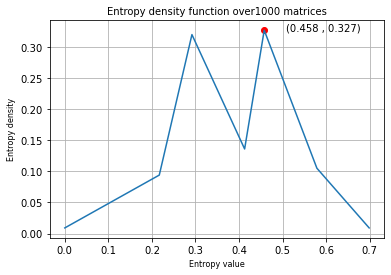

In [260]:
x = []
y = []
for row in vector_fr2:
    x.append(row[0])
    y.append(row[1])

i = 0
fr_max = 0.
for v in range(int(len(vector_fr2))):
    if vector_fr2[v][1] > fr_max:
        i = v
        fr_max = vector_fr2[v][1]
    
fig, ax = plt.subplots()
title = 'Entropy density function over' + str(Number) + ' matrices'
coor = "(" + str(vector_fr2[i][0]) + " , " + str(vector_fr2[i][1]) + ")"
plt.plot(x, y)
plt.scatter(vector_fr2[i][0], vector_fr2[i][1], c = 'r')
plt.text(vector_fr2[i][0]+0.05, vector_fr2[i][1], coor)
ax.set_xlabel('Entropy value', fontsize=8)
ax.set_ylabel('Entropy density', fontsize=8)
ax.set_title(title , fontsize = 10)
ax.grid(True)
plt.show()